<a href="https://colab.research.google.com/github/agnislur/air_quality_in_yogyakarta/blob/main/FinalProject_AirQualityML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# CLEANING

In [2]:
df=pd.read_csv("polusi_udara_jogja2020.csv")
df

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...
361,12/27/2020,12,1,24,0,0,24,CO,Good
362,12/28/2020,9,0,16,2,0,16,CO,Good
363,12/29/2020,9,0,15,20,0,20,O3,Good
364,12/30/2020,6,0,17,10,0,17,CO,Good


| Kolom | Deskripsi |
|---|---|
| Tanggal | Menunjukkan tanggal dilakukannya pengukuran kualitas udara. |
| PM10 | Singkatan dari Particulate Matter 10. Ini adalah ukuran partikel debu atau polutan sangat kecil yang berdiameter kurang dari 10 mikrometer. Partikel ini dapat masuk jauh ke dalam paru-paru dan menyebabkan masalah kesehatan. |
| SO2 | Singkatan dari Sulfur Dioksida. Ini adalah gas yang dihasilkan dari pembakaran bahan bakar fosil dan dapat menyebabkan masalah pernapasan dan hujan asam. |
| CO | Singkatan dari Karbon Monoksida. Gas beracun yang dihasilkan dari pembakaran tidak sempurna dan dapat menyebabkan keracunan. |
| O3 | Singkatan dari Ozon. Gas yang terbentuk di atmosfer dan dapat menyebabkan masalah pernapasan, terutama pada anak-anak, orang tua, dan orang dengan penyakit paru-paru. |
| NO2 | Singkatan dari Nitrogen Dioksida. Gas yang dihasilkan dari pembakaran bahan bakar fosil dan dapat menyebabkan masalah pernapasan dan iritasi mata. |
| Max | Nilai tertinggi dari semua polutan yang diukur pada hari tersebut. Ini menunjukkan polutan mana yang paling dominan pada hari itu. |
| Komponen Kritis | Menunjukkan polutan mana yang memiliki nilai tertinggi (Max) pada hari tersebut. Ini adalah polutan yang paling berkontribusi terhadap buruknya kualitas udara pada hari itu. |
| Kategori | Klasifikasi umum tentang kualitas udara pada hari tersebut, apakah termasuk kategori baik, sedang, buruk, atau sangat buruk. Klasifikasi ini biasanya berdasarkan pada nilai maksimum dari semua polutan dan standar kualitas udara yang berlaku. |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.shape

(366, 9)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

# EDA

In [8]:
df['Category'].unique()

array(['Moderate', 'Good', 'Unhealthy'], dtype=object)

In [9]:
df['Critical Component'].unique()

array(['CO', 'O3', 'PM10', 'PM10, CO', 'PM10,CO', 'CO, PM10', 'PM10,O3'],
      dtype=object)

In [10]:
df.describe()

,Date,PM10,SO2,CO,O3,NO2,Max
count,366,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,2020-07-01 12:00:00,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
min,2020-01-01 00:00:00,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,2020-04-01 06:00:00,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,2020-07-01 12:00:00,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,2020-09-30 18:00:00,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,2020-12-31 00:00:00,60.000000,6.000000,164.000000,81.000000,0.0,164.000000
std,NaN,9.023704,1.012017,22.263521,14.172026,0.0,21.397890


In [11]:
len(df.columns)

9

In [12]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2020-01-01,30,2,69,19,0,69,CO,Moderate
1,2020-01-02,16,2,58,33,0,58,CO,Moderate
2,2020-01-03,12,2,46,18,0,46,CO,Good
3,2020-01-04,8,2,84,29,0,84,CO,Moderate
4,2020-01-05,8,3,50,0,0,50,CO,Good


**Visualisasi Data**

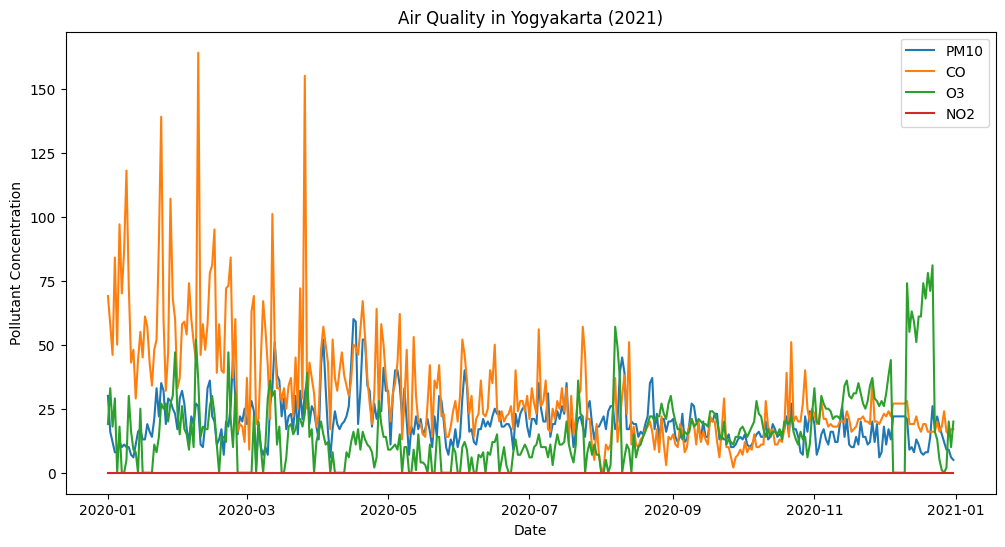

In [13]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PM10', label='PM10')
sns.lineplot(data=df, x='Date', y='CO', label='CO')
sns.lineplot(data=df, x='Date', y='O3', label='O3')
sns.lineplot(data=df, x='Date', y='NO2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2021)')
plt.legend()
plt.show()

##### Analisis Plot Di Atas

Grafik ini menunjukkan tren konsentrasi polutan udara (PM10, CO, O3, NO2) di Yogyakarta selama 2020. Karbon monoksida (CO) mendominasi dengan fluktuasi tertinggi, mencapai puncak lebih dari 150 µg/m³ pada awal tahun, yang kemungkinan besar disebabkan oleh aktivitas kendaraan bermotor. Konsentrasi ozon (O3) cenderung meningkat pada akhir tahun, menunjukkan pengaruh sinar matahari terhadap pembentukannya. PM10 memiliki pola yang lebih stabil dengan nilai konsentrasi sebagian besar di bawah 50 µg/m³, sementara nitrogen dioksida (NO2) menunjukkan konsentrasi yang sangat rendah dan hampir tidak berubah sepanjang tahun. Secara keseluruhan, grafik ini menggambarkan CO sebagai polutan kritis utama, dengan tren kualitas udara yang relatif membaik setelah pertengahan tahun, kemungkinan akibat pengurangan aktivitas manusia selama pandemi.

C:\Users\alfar\AppData\Local\Temp\ipykernel_20996\1579700810.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


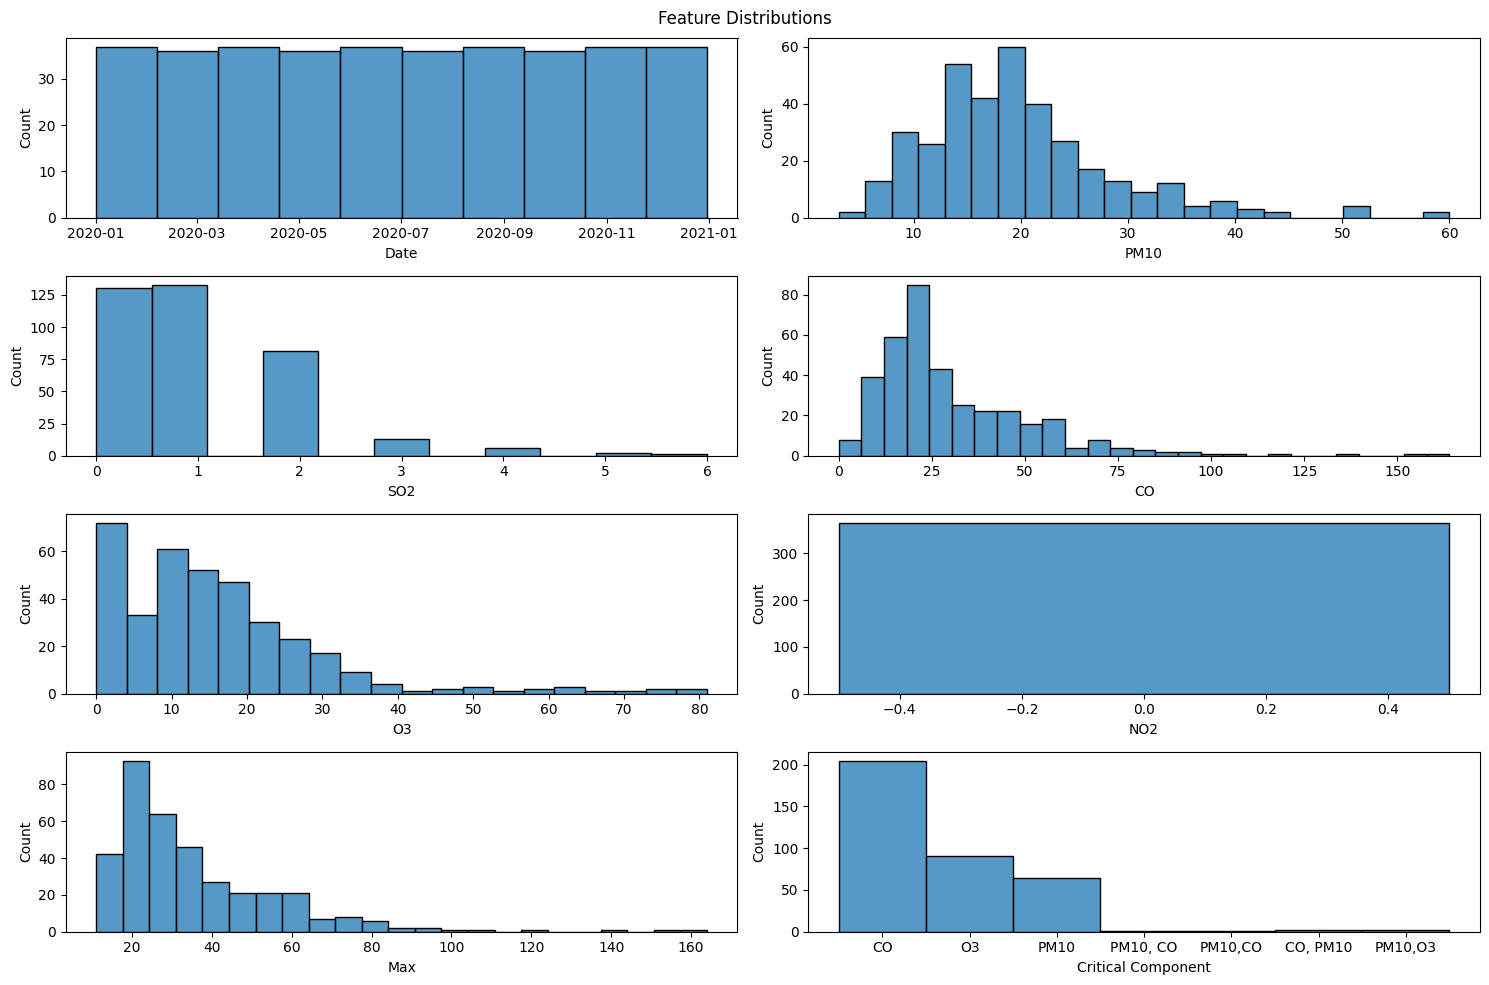

In [14]:
n_rows = 4
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10))

for i in range(n_rows):
  for j in range(n_cols):
    feature = df.columns[i*n_cols+j]
    sns.histplot(x=df[feature], ax=axs[i][j])

fig.suptitle("Feature Distributions")
fig.tight_layout()
fig.show()

##### Analisis Distribusi Kualitas Udara Yogyakarta Tahun 2020

Berdasarkan analisis distribusi data kualitas udara Yogyakarta pada tahun 2020, dapat disimpulkan bahwa:

* **SO2 dan NO2:** Konsentrasi kedua polutan ini sangat rendah, dengan mayoritas nilai SO2 berada di bawah 2 µg/m³. NO2 bahkan hampir tidak terdeteksi. Hal ini mengindikasikan bahwa sumber emisi SO2 dan NO2, seperti industri berat, telah terkendali dengan baik.
* **CO:** Polutan CO memiliki distribusi yang lebih luas dengan konsentrasi maksimum hingga 150 µg/m³. Hal ini menjadikan CO sebagai polutan kritis utama di Yogyakarta, yang kemungkinan besar bersumber dari emisi kendaraan bermotor dan aktivitas pembakaran lainnya.
* **PM10 dan O3:** Kedua polutan ini menunjukkan distribusi yang lebih seragam dibandingkan CO. Meskipun demikian, sebagian besar nilai konsentrasi berada di bawah 30 µg/m³.
* **Nilai Maksimum (Max):** Sebagian besar nilai maksimum polutan didominasi oleh CO, yang sekali lagi mengkonfirmasi bahwa aktivitas manusia, terutama sektor transportasi, menjadi kontributor utama terhadap kualitas udara di Yogyakarta.
* **Kategori Kualitas Udara:** Secara keseluruhan, data menunjukkan bahwa kualitas udara di Yogyakarta pada tahun 2020 berada dalam kategori baik hingga sedang.

c:\Users\alfar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


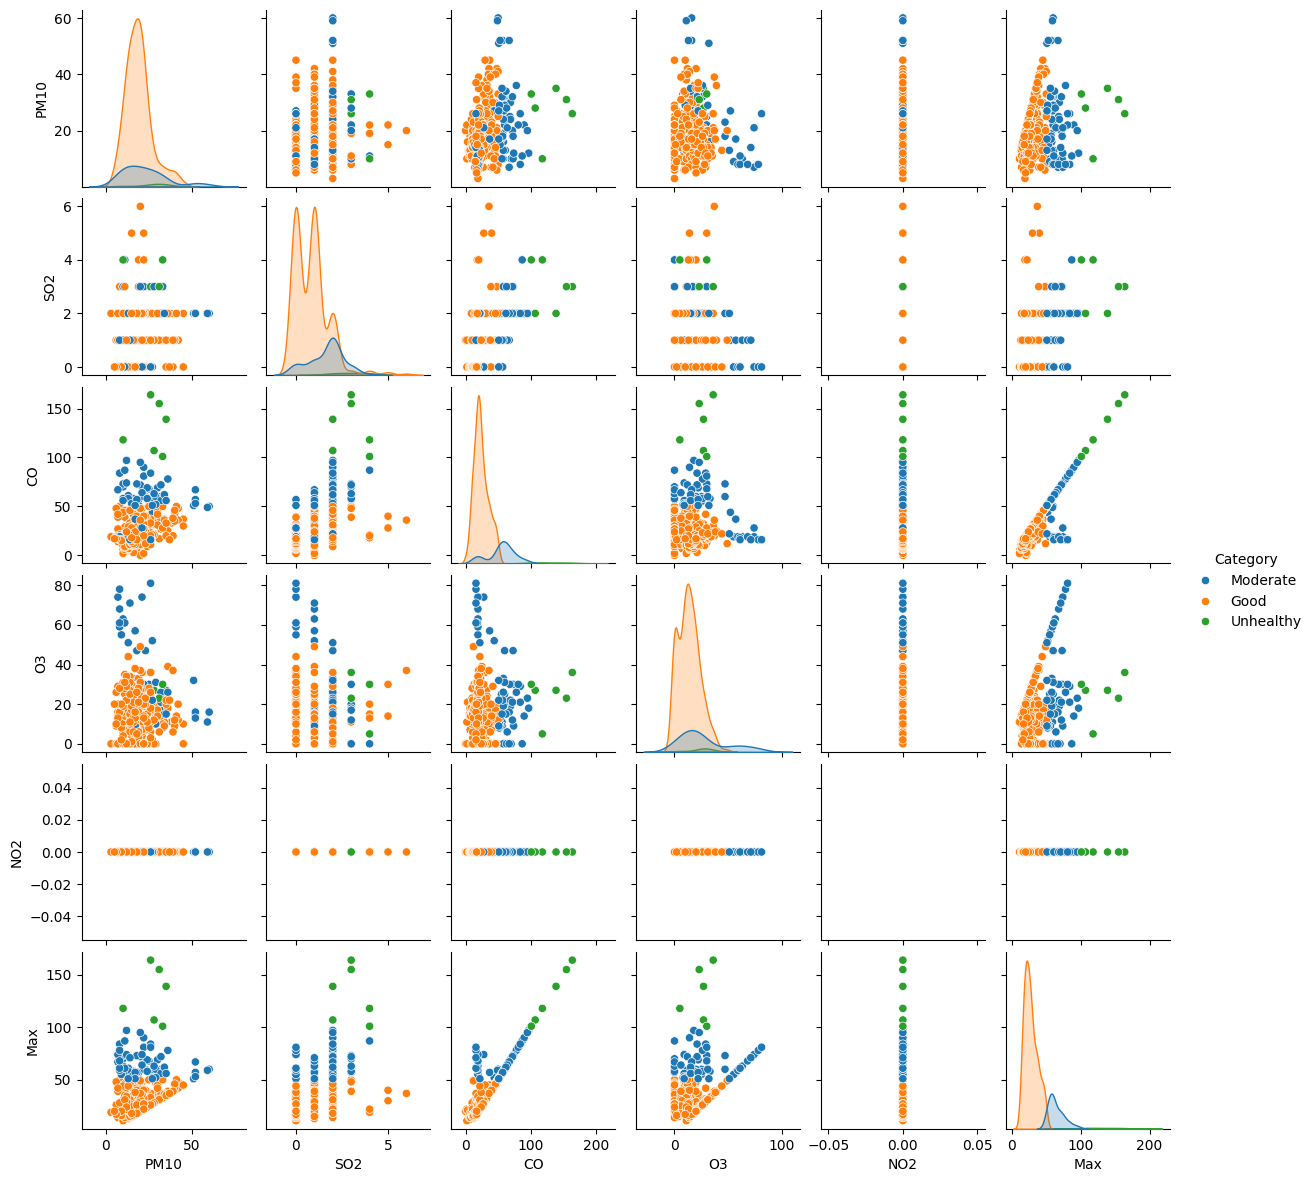

In [15]:
sns.pairplot(df, hue="Category", size=2)
plt.show()

##### Analisis Visualisasi Pairplot Kualitas Udara Yogyakarta 2020

Visualisasi pasangan ini memperlihatkan hubungan antara polutan (PM10, SO2, CO, O3, NO2, Max) dengan kategori kualitas udara (Good, Moderate, Unhealthy). Mayoritas data berada dalam kategori "Good" dan "Moderate," dengan "Unhealthy" hanya muncul pada konsentrasi tinggi CO dan O3.
PM10 dan CO memiliki distribusi yang lebar, dengan CO berkontribusi signifikan terhadap kategori "Unhealthy." Korelasi antara Max dan CO menunjukkan bahwa CO sering menjadi komponen kritis. NO2 dan SO2 memiliki distribusi yang rendah dan tidak menunjukkan variasi signifikan antar kategori. Data ini menegaskan peran utama CO dan O3 dalam menentukan kualitas udara di Yogyakarta.

C:\Users\alfar\AppData\Local\Temp\ipykernel_20996\3386938978.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Category", y="Max", hue="Critical Component", ci=None)


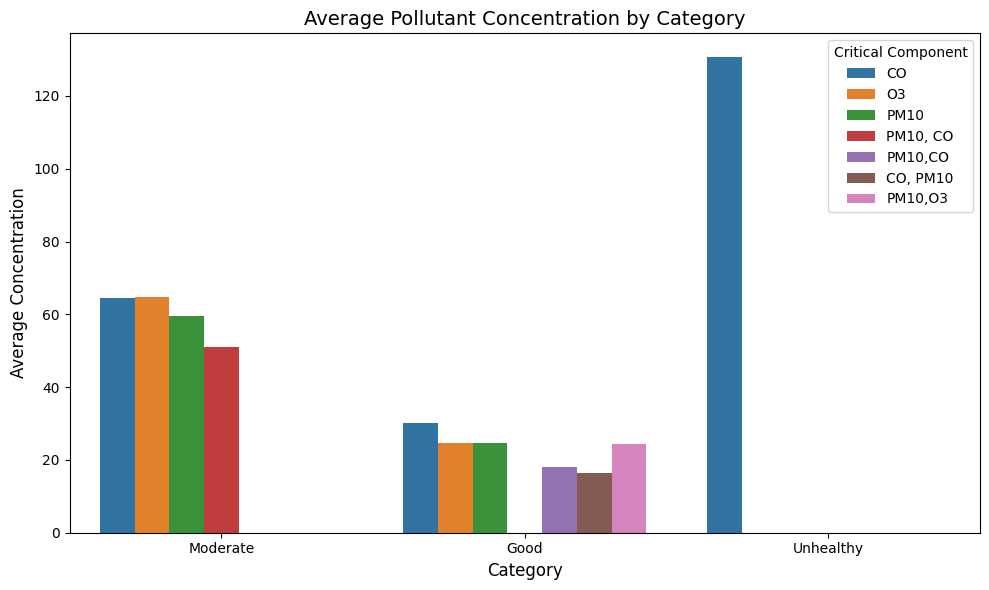

In [16]:
# Membuat grafik rata-rata nilai masing-masing polutan terhadap kategori kualitas udara
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Category", y="Max", hue="Critical Component", ci=None)

# Menambahkan judul dan label
plt.title("Average Pollutant Concentration by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Concentration", fontsize=12)
plt.legend(title="Critical Component", fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan rata-rata konsentrasi polutan berdasarkan kategori kualitas udara. Kategori "Moderate" didominasi oleh karbon monoksida (CO), ozon (O3), dan partikel PM10 dengan rata-rata konsentrasi sekitar 60 µg/m³. Pada kategori "Good," rata-rata konsentrasi semua polutan jauh lebih rendah, sekitar 20 µg/m³, mencerminkan kualitas udara yang lebih baik. Sementara itu, kategori "Unhealthy" sepenuhnya dipengaruhi oleh CO dengan rata-rata konsentrasi yang sangat tinggi, lebih dari 120 µg/m³, menunjukkan bahwa peningkatan signifikan CO menjadi penyebab utama kondisi udara buruk.

In [17]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2020-01-01,30,2,69,19,0,69,CO,Moderate
1,2020-01-02,16,2,58,33,0,58,CO,Moderate
2,2020-01-03,12,2,46,18,0,46,CO,Good
3,2020-01-04,8,2,84,29,0,84,CO,Moderate
4,2020-01-05,8,3,50,0,0,50,CO,Good


In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
processed_data = df.copy()
processed_data["Critical Component"] = LabelEncoder().fit_transform(processed_data["Critical Component"])

# map Label to ordinal encoding
label_map = {
    "Moderate": 0,
    "Good": 1,
    "Unhealthy": 2,
}
processed_data = processed_data.replace({"Category": label_map})

processed_data.head()

C:\Users\alfar\AppData\Local\Temp\ipykernel_20996\1957700500.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  processed_data = processed_data.replace({"Category": label_map})


,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2020-01-01,30,2,69,19,0,69,0,0
1,2020-01-02,16,2,58,33,0,58,0,0
2,2020-01-03,12,2,46,18,0,46,0,1
3,2020-01-04,8,2,84,29,0,84,0,0
4,2020-01-05,8,3,50,0,0,50,0,1


In [20]:
processed_data.describe()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
count,366,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000
mean,2020-07-01 12:00:00,19.699454,1.021858,31.161202,16.054645,0.0,35.800546,1.084699,0.833333
min,2020-01-01 00:00:00,3.000000,0.000000,0.000000,0.000000,0.0,11.000000,0.000000,0.000000
25%,2020-04-01 06:00:00,14.000000,0.000000,18.000000,7.000000,0.0,21.000000,0.000000,1.000000
50%,2020-07-01 12:00:00,18.500000,1.000000,23.500000,14.000000,0.0,28.000000,0.000000,1.000000
75%,2020-09-30 18:00:00,23.000000,2.000000,40.000000,22.000000,0.0,45.000000,2.000000,1.000000
max,2020-12-31 00:00:00,60.000000,6.000000,164.000000,81.000000,0.0,164.000000,6.000000,2.000000
std,NaN,9.023704,1.012017,22.263521,14.172026,0.0,21.397890,1.307905,0.414905


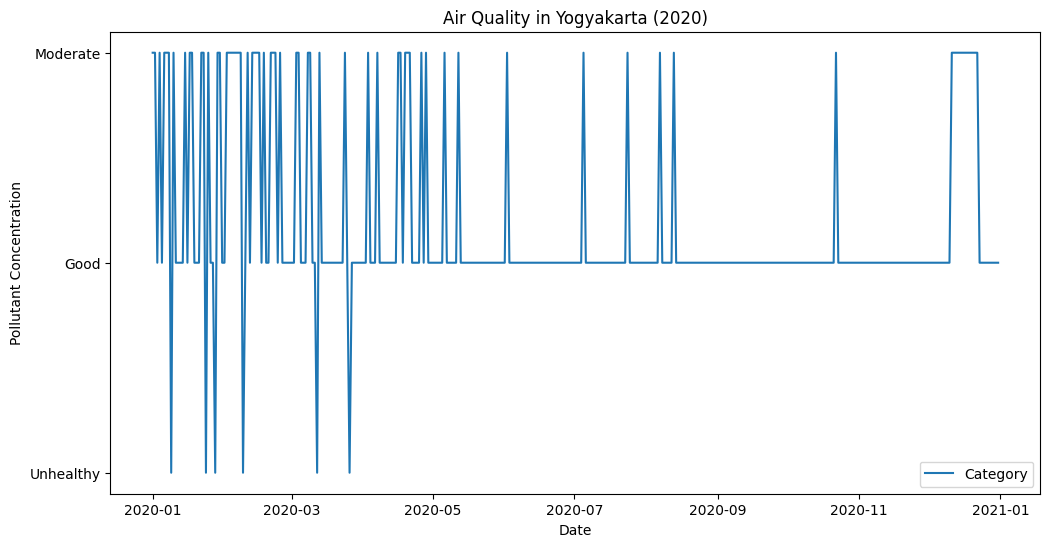

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Category', label='Category')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2020)')
plt.legend()
plt.show()

##### Analisis Fluktuasi Kategori Kualitas Udara di Yogyakarta (2020)

Visualisasi yang disajikan gambaran mengenai dinamika kualitas udara di Yogyakarta sepanjang tahun 2020.

* Sebagian besar hari sepanjang tahun 2020, Yogyakarta berada dalam kategori "Good" yang mengindikasikan kualitas udara yang sehat. Hal ini menunjukkan bahwa secara umum, kondisi udara di Yogyakarta cukup baik.
* Kategori "Moderate" terlihat cukup sering muncul, terutama pada awal hingga pertengahan tahun. Peningkatan kategori ini kemungkinan besar dipengaruhi oleh aktivitas manusia seperti transportasi dan aktivitas industri sebelum pandemi COVID-19.
* Kategori "Unhealthy" sangat jarang muncul sepanjang tahun, menunjukkan bahwa kejadian polusi udara ekstrem hampir tidak terjadi di Yogyakarta. Hal ini merupakan indikasi positif bahwa upaya pengendalian polusi udara telah berjalan dengan baik.
* Setelah pertengahan tahun, terjadi peningkatan signifikan pada proporsi hari dengan kategori "Good". Hal ini sangat mungkin disebabkan oleh pengurangan aktivitas manusia akibat pembatasan sosial yang diterapkan selama pandemi COVID-19.


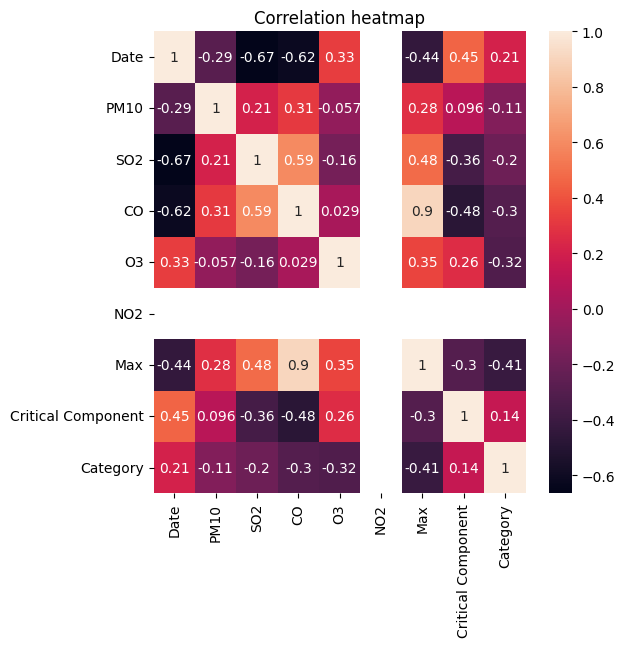

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(processed_data.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

##### Analisis Heatmap Korelasi Kualitas Udara Yogyakarta

Heatmap korelasi memberikan gambaran visual mengenai hubungan antar variabel dalam dataset kualitas udara Yogyakarta. Berikut adalah temuan utama berdasarkan heatmap:

* **CO dan Max:** Terdapat korelasi positif yang sangat kuat (0.9) antara konsentrasi CO dan nilai maksimum polutan (Max). Hal ini menunjukkan bahwa CO merupakan komponen kritis utama yang sering menentukan nilai maksimum polutan. Dengan kata lain, peningkatan konsentrasi CO cenderung diikuti oleh peningkatan nilai maksimum polutan.
* **SO2 dan CO:** Korelasi positif yang cukup tinggi (0.59) ditemukan antara SO2 dan CO. Ini mengindikasikan bahwa kedua polutan ini cenderung meningkat secara bersamaan. Meskipun demikian, perlu diingat bahwa secara umum konsentrasi SO2 relatif rendah.
* **PM10 dan O3:** Korelasi antara PM10 dan O3 sangat lemah hingga negatif (-0.057). Hal ini menunjukkan bahwa tidak terdapat hubungan yang signifikan antara kedua polutan ini. Kenaikan konsentrasi salah satu polutan tidak secara langsung mempengaruhi konsentrasi polutan lainnya.
* **Kategori Kualitas Udara:**
    * **CO dan Kategori:** Terdapat korelasi negatif yang cukup kuat (-0.3) antara konsentrasi CO dan kategori kualitas udara. Artinya, semakin tinggi konsentrasi CO, semakin buruk kategori kualitas udara.
    * **Max dan Kategori:** Korelasi negatif yang lebih kuat (-0.41) ditemukan antara nilai maksimum polutan (Max) dan kategori kualitas udara. Hal ini semakin menegaskan bahwa nilai maksimum polutan, yang sering didominasi oleh CO, merupakan indikator yang baik untuk kualitas udara secara keseluruhan.
    * **SO2 dan Kategori:** Korelasi negatif yang kecil (-0.2) menunjukkan bahwa SO2 memiliki sedikit pengaruh terhadap penurunan kategori kualitas udara.

**Kesimpulan:**

Berdasarkan analisis heatmap korelasi, dapat disimpulkan bahwa:

* **CO** merupakan polutan utama yang paling berkontribusi terhadap penurunan kualitas udara di Yogyakarta.
* **SO2** juga memiliki kontribusi terhadap penurunan kualitas udara, namun pengaruhnya tidak sebesar CO.
* **PM10 dan O3** memiliki hubungan yang lemah atau tidak signifikan dengan polutan lainnya dan dengan kategori kualitas udara.

**Visualisasi heatmap korelasi** akan sangat membantu dalam memahami hubungan kompleks antara berbagai polutan dan memberikan gambaran yang lebih jelas mengenai faktor-faktor yang mempengaruhi kualitas udara di Yogyakarta.

In [23]:
processed_data

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2020-01-01,30,2,69,19,0,69,0,0
1,2020-01-02,16,2,58,33,0,58,0,0
2,2020-01-03,12,2,46,18,0,46,0,1
3,2020-01-04,8,2,84,29,0,84,0,0
4,2020-01-05,8,3,50,0,0,50,0,1
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,12,1,24,0,0,24,0,1
362,2020-12-28,9,0,16,2,0,16,0,1
363,2020-12-29,9,0,15,20,0,20,2,1
364,2020-12-30,6,0,17,10,0,17,0,1


# PRE-PROCESSING

In [24]:
processed_data = processed_data.drop(columns=["Date","Max","NO2","Critical Component"])
processed_data.head()

,PM10,SO2,CO,O3,Category
0,30,2,69,19,0
1,16,2,58,33,0
2,12,2,46,18,1
3,8,2,84,29,0
4,8,3,50,0,1


Kolom "Date" dihapus karena tidak relevan secara langsung dalam analisis kualitas udara sebagai variabel numerik atau kategorikal. "Max" dihapus karena merupakan hasil perhitungan dari data polutan lainnya, sehingga dapat menyebabkan redundansi. "NO2" dihapus karena nilai konsentrasinya sangat rendah dan tidak memberikan kontribusi signifikan terhadap analisis. "Critical Component" dihapus karena sudah terwakili oleh nilai-nilai polutan individual (CO, PM10, O3, dll.). Penghapusan ini dilakukan untuk menyederhanakan dataset dan mengurangi noise dalam analisis atau pemodelan.

#### **Visualisasi Data**

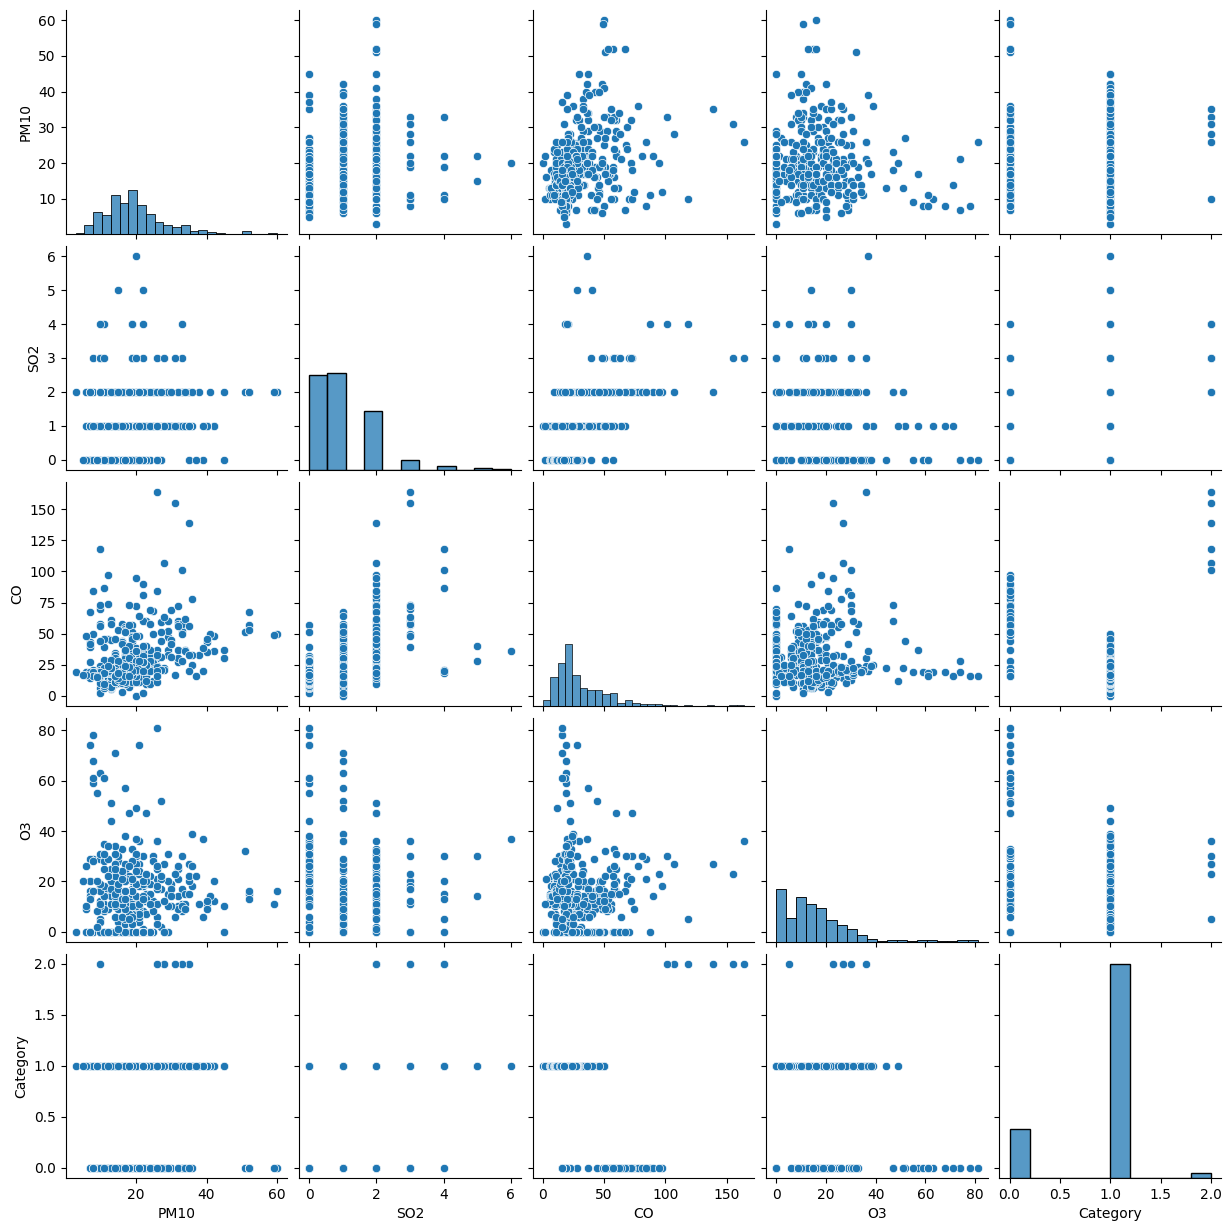

In [25]:
sns.pairplot(processed_data)
plt.show()

Plot di atas menunjukkan hubungan antar variabel polutan (PM10, SO2, CO, O3) dengan kategori kualitas udara. Terlihat bahwa konsentrasi CO memiliki distribusi yang lebih luas dibandingkan polutan lainnya dan berhubungan negatif dengan kategori, di mana nilai CO yang lebih tinggi cenderung menurunkan kualitas udara. PM10 dan O3 memiliki hubungan yang lemah dengan kategori, menunjukkan bahwa kedua polutan ini tidak terlalu dominan dalam memengaruhi kualitas udara. SO2 cenderung konstan pada nilai rendah dan memiliki pengaruh yang minimal terhadap kategori. Secara keseluruhan, CO adalah variabel yang paling berpengaruh dalam menentukan kualitas udara, sedangkan polutan lainnya memiliki pengaruh yang lebih kecil.

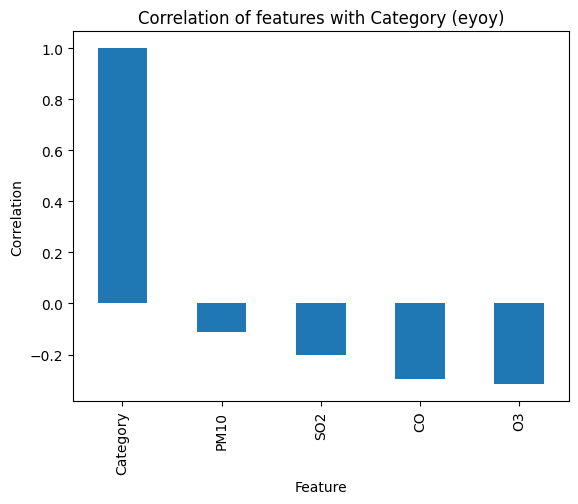

In [26]:
target_corr = processed_data.corr()["Category"]
target_corr = target_corr.sort_values(ascending=False)
target_corr.plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of features with Category (eyoy)")
plt.show()

Plot di atas menunjukkan korelasi variabel PM10, SO2, CO, dan O3 terhadap kategori kualitas udara. Hasilnya menunjukkan bahwa semua variabel memiliki korelasi negatif terhadap kategori, artinya peningkatan nilai polutan cenderung menurunkan kualitas udara (kategori menuju "Moderate" atau "Unhealthy"). CO dan O3 memiliki korelasi negatif paling kuat dibandingkan dengan PM10 dan SO2, mengindikasikan bahwa kedua polutan ini memiliki pengaruh lebih besar terhadap penurunan kualitas udara. PM10 dan SO2 memiliki korelasi yang lebih lemah, menunjukkan dampaknya yang lebih kecil terhadap kategori. Secara keseluruhan, CO dan O3 adalah faktor dominan yang memengaruhi kualitas udara di dataset ini.

#### **Feature Engineering**

In [27]:
X = processed_data[["O3", "CO", "SO2", "PM10"]]
y = processed_data["Category"]

print(X.shape)
print(y.shape)

(366, 4)
(366,)


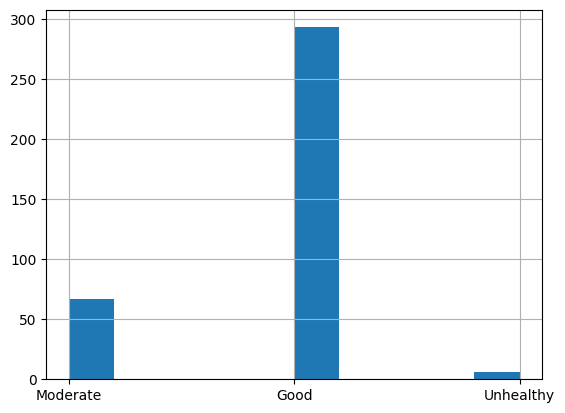

In [28]:
df["Category"].hist()
plt.show()

Grafik ini menunjukkan distribusi yang sangat tidak seimbang antara kategori target untuk pemodelan klasifikasi. Sebagian besar data berada pada kategori "Good", dengan kategori "Moderate" jauh lebih sedikit, dan kategori "Unhealthy" hampir tidak ada. Ketidakseimbangan ini menjadi tantangan serius dalam membangun model klasifikasi, karena model cenderung bias terhadap kategori mayoritas ("Good") dan mengabaikan kategori minoritas ("Moderate" dan "Unhealthy"). Akibatnya, model mungkin gagal mendeteksi atau memprediksi data dengan kategori minoritas secara akurat. Untuk mengatasi masalah ini, perlu dilakukan strategi penyeimbangan data (Sampling data)

# **Modelling**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi data menjadi latihan (80%) untuk melatih model dan uji (20%) untuk mengevaluasi performa model. Pembagian ini penting untuk memastikan model dapat bekerja baik pada data baru. Penggunaan random_state=42 memastikan hasil pembagian selalu sama setiap kali dijalankan.

##### **Oversampling**

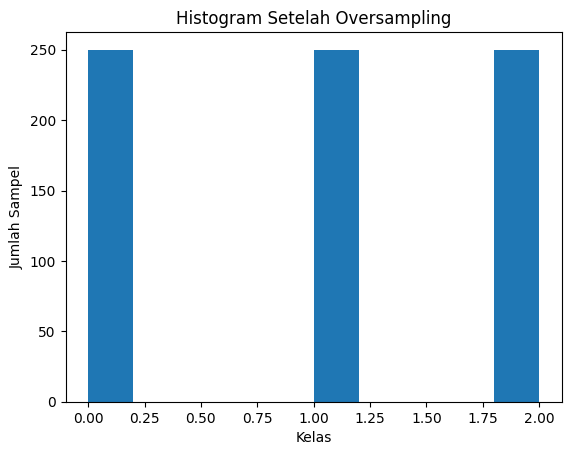

In [30]:
oversampler = RandomOverSampler(sampling_strategy={0:250,1:250,2:250}, random_state=42)
X_train_resampled9, y_train_resampled9 = oversampler.fit_resample(X_train, y_train)
plt.hist(y_train_resampled9)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Histogram Setelah Oversampling')
plt.show()


Grafik di atas menunjukkan distribusi kelas setelah proses oversampling menggunakan metode RandomOverSampler. Sebelumnya, dataset tidak seimbang dengan jumlah sampel yang berbeda-beda di setiap kelas. Setelah oversampling, setiap kelas memiliki jumlah sampel yang sama, yaitu 250, sehingga distribusi menjadi seimbang. Hal ini penting untuk meningkatkan performa model klasifikasi, karena model sekarang dapat belajar secara adil dari semua kelas tanpa bias terhadap kelas mayoritas. Dengan distribusi yang seimbang, model lebih mampu memprediksi kelas minoritas dengan lebih akurat.

##### **Visualisasi setelah dan sebelum oversampling**

<Figure size 1200x400 with 0 Axes>

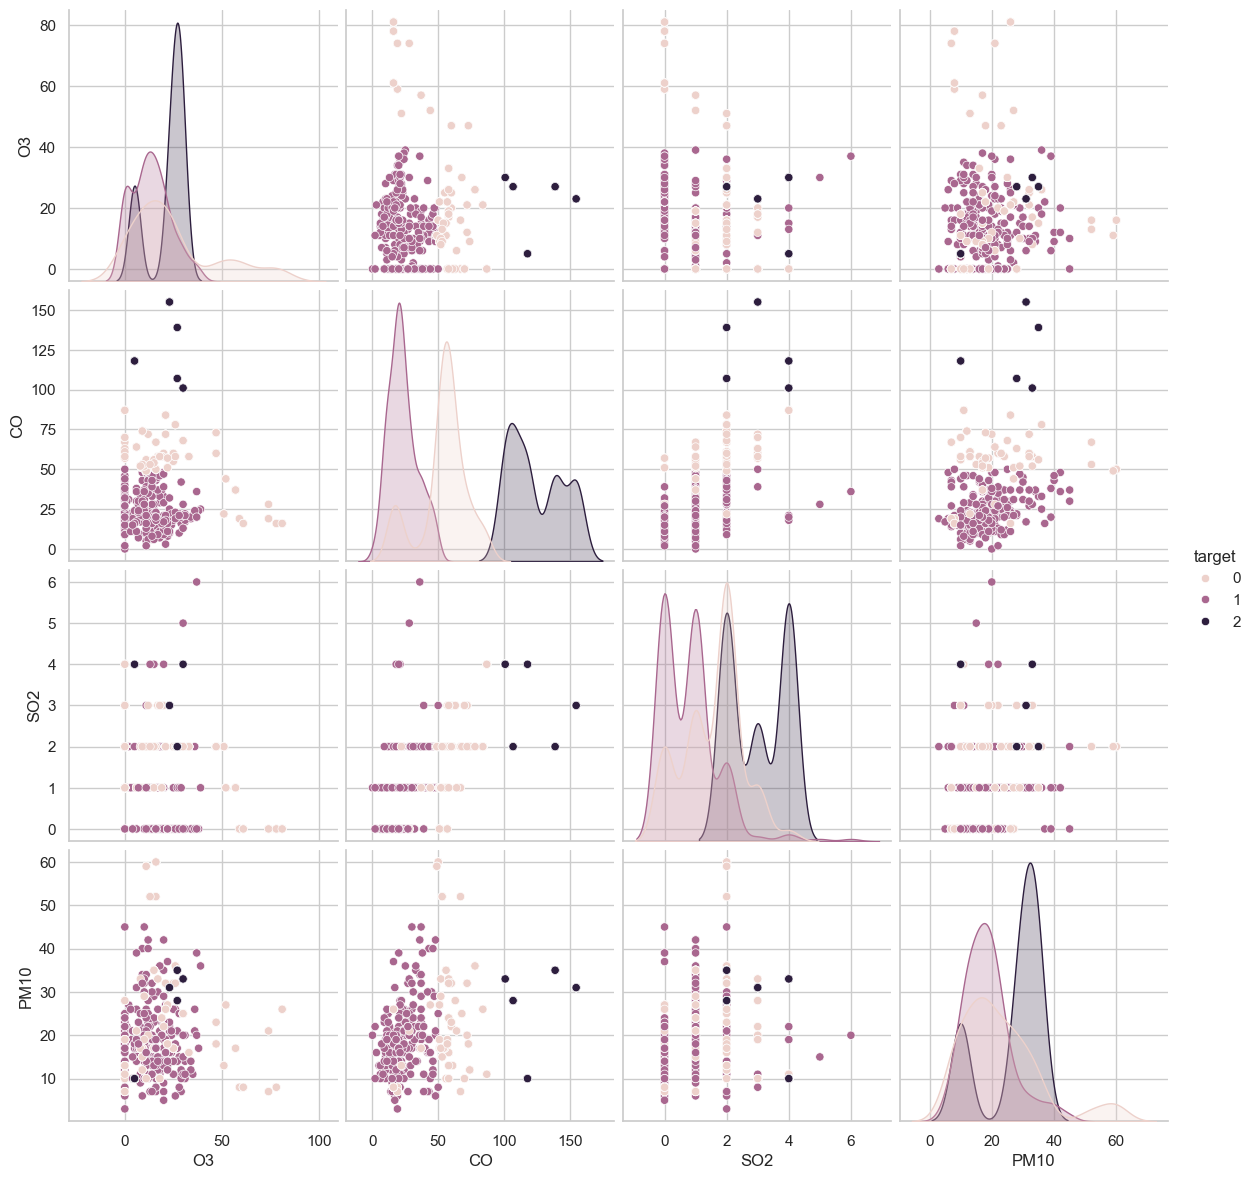

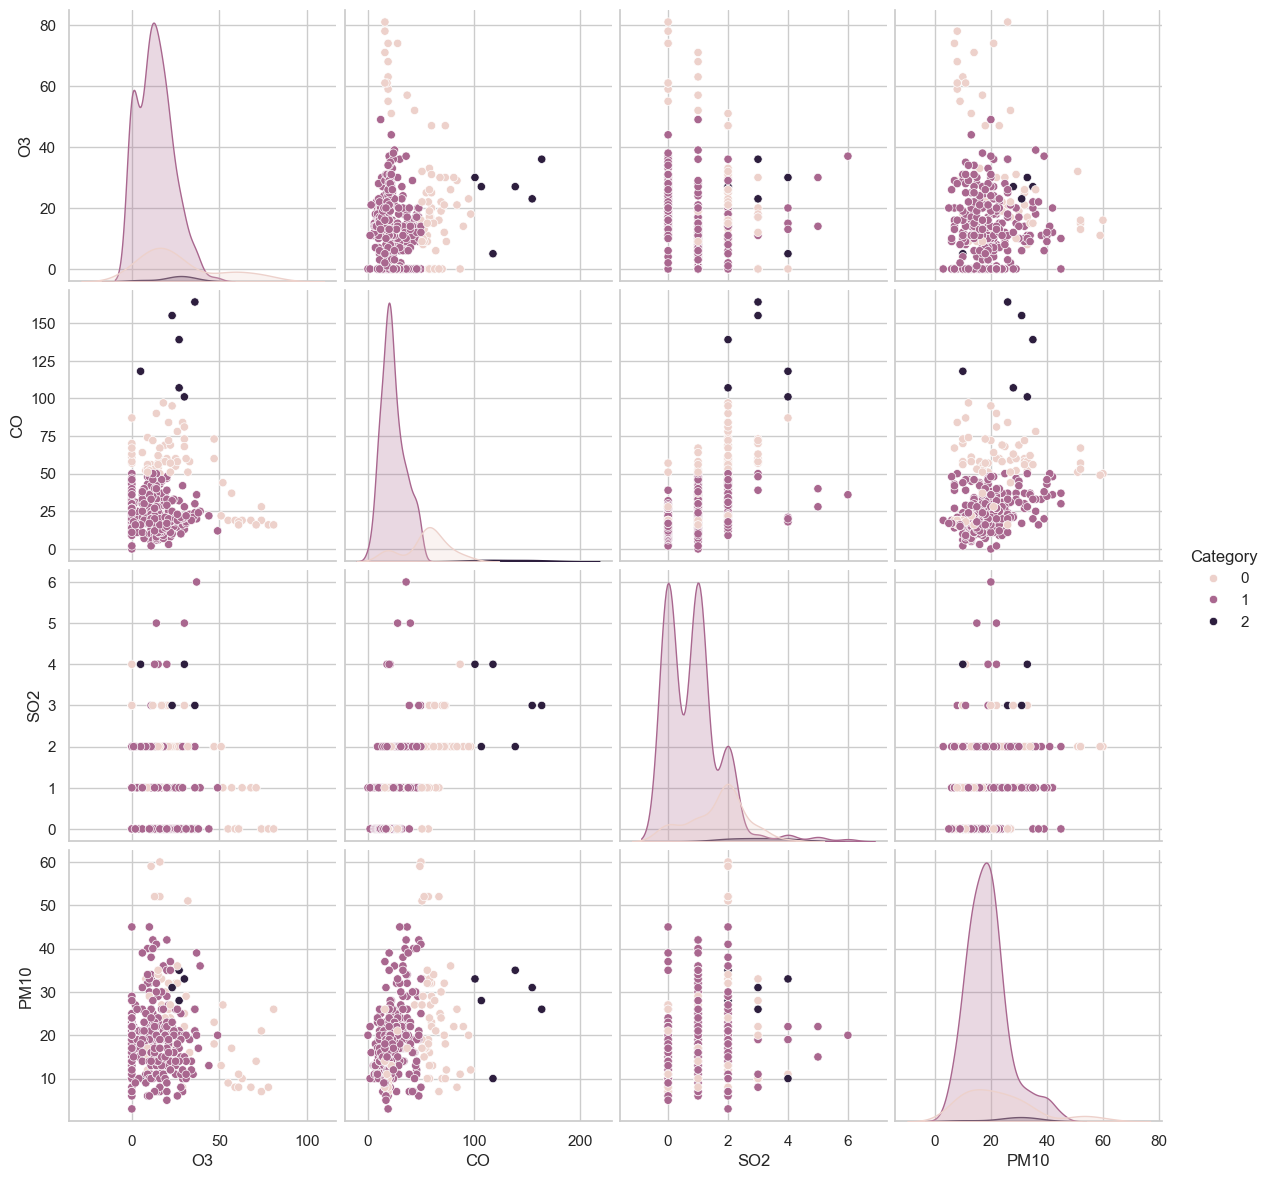

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df_resampled = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampled['target'] = y_train_resampled9

sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

sns.pairplot(df_resampled[['O3', 'CO', 'SO2', 'PM10', 'target']], hue='target', diag_kind='kde', height=3, aspect=1)
plt.show()

sns.pairplot(processed_data[['O3', 'CO', 'SO2', 'PM10', 'Category']], hue='Category', diag_kind='kde', height=3, aspect=1)
plt.show()



Grafik pertama menunjukkan hubungan antar variabel (O3, CO, SO2, PM10) setelah proses oversampling, sedangkan grafik kedua menggunakan data asli sebelum oversampling. Pada grafik pertama, distribusi data antar kategori target lebih seimbang karena proses oversampling telah menambah data pada kelas minoritas. Sebaliknya, grafik kedua menunjukkan ketidakseimbangan distribusi, di mana kategori mayoritas mendominasi.

Setelah oversampling, pola hubungan antar variabel dan kategori lebih terlihat, seperti konsentrasi CO yang tinggi cenderung terkait dengan kategori target tertentu. Distribusi SO2 tetap rendah untuk semua kategori di kedua grafik, menunjukkan dampaknya yang kecil terhadap klasifikasi. Secara keseluruhan, oversampling membantu memberikan distribusi data yang lebih adil, memungkinkan model mempelajari pola kategori minoritas dengan lebih baik.

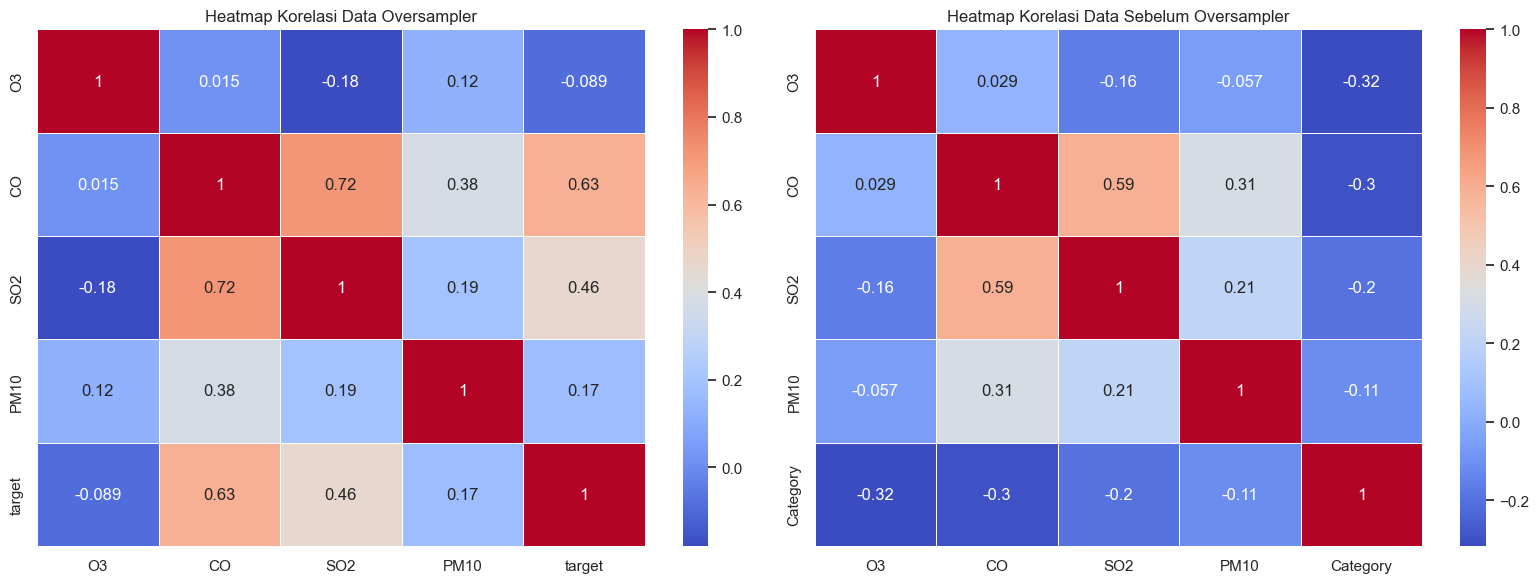

In [32]:

df_resampledb = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampledb['target'] = y_train_resampled9

correlation_matrix_oversampler = df_resampledb[['O3', 'CO', 'SO2', 'PM10', 'target']].corr()

correlation_matrix_original = processed_data[['O3', 'CO', 'SO2', 'PM10', 'Category']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Heatmap Korelasi Data Sebelum Oversampler')

sns.heatmap(correlation_matrix_oversampler, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap Korelasi Data Oversampler')

plt.tight_layout()
plt.show()


Perbandingan heatmap sebelum dan setelah oversampling menunjukkan perubahan pada korelasi antar variabel. Sebelum oversampling, distribusi data yang tidak seimbang mengakibatkan bias pada kategori mayoritas, sehingga korelasi antara variabel dengan target (kategori) lebih rendah, terutama untuk variabel seperti O3 dan SO2.

Setelah oversampling, korelasi antara variabel dengan target menjadi lebih kuat, seperti pada CO (0.63) dan SO2 (0.46). Hal ini terjadi karena oversampling menyeimbangkan distribusi data antar kategori, sehingga hubungan antar variabel dengan target lebih terwakili secara adil. Oversampling juga membantu variabel minoritas, seperti SO2, menjadi lebih relevan dalam menentukan target. Secara keseluruhan, heatmap setelah oversampling lebih mencerminkan hubungan yang proporsional antar variabel dan target, yang meningkatkan potensi performa model klasifikasi.

#### Modelling Decision Tree, Random Forest, dan XGB

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import pickle

In [34]:
# Fungsi untuk membuat pipeline dan menyimpan model
def create_pipeline_and_save(model, filename):
    # Pipeline sederhana model
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # Latih pipeline
    pipeline.fit(X_train_resampled9, y_train_resampled9)
    
    # Simpan model ke file
    with open(filename, 'wb') as file:
        pickle.dump(pipeline, file)

    return pipeline

In [35]:


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_pipeline = create_pipeline_and_save(dt_model, 'decision_tree_model.pkl')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = create_pipeline_and_save(rf_model, 'random_forest_model.pkl')

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
xgb_pipeline = create_pipeline_and_save(xgb_model, 'xgboost_model.pkl')

# Evaluasi 

In [36]:
# Evaluasi Model
models = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "XGBoost": xgb_pipeline
}


Decision Tree Confusion Matrix:


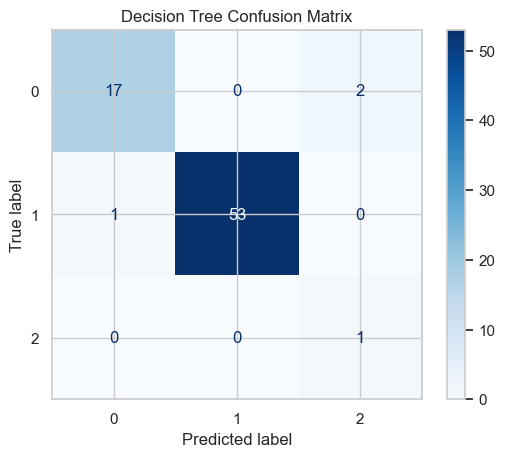


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       1.00      0.98      0.99        54
           2       0.33      1.00      0.50         1

    accuracy                           0.96        74
   macro avg       0.76      0.96      0.80        74
weighted avg       0.98      0.96      0.97        74


Random Forest Confusion Matrix:


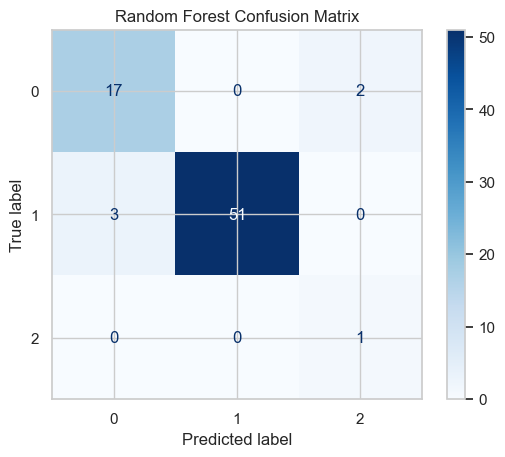


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       1.00      0.94      0.97        54
           2       0.33      1.00      0.50         1

    accuracy                           0.93        74
   macro avg       0.73      0.95      0.78        74
weighted avg       0.95      0.93      0.94        74


XGBoost Confusion Matrix:


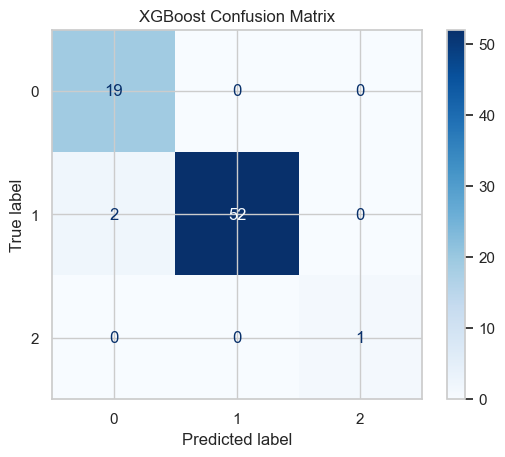


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.96      0.98        54
           2       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.97      0.99      0.98        74
weighted avg       0.98      0.97      0.97        74



In [37]:
results_oversampling = []

for model_name, pipeline in models.items():
    # Prediksi dan evaluasi
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)
    
    # Hitung metrik
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    accuracy = pipeline.score(X_test, y_test)
    report = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    
    # Tampilkan confusion matrix
    print(f"\n{model_name} Confusion Matrix:")
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Simpan hasil
    results_oversampling.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'AUC': auc
    })
    
    print(f"\n{model_name} Classification Report:")
    print(report)

### Hasil Evaluasi 

- Decision Tree:
    - Akurasi: 96%
    - Kekuatan: Sangat baik pada kelas mayoritas (kelas 1) dengan precision dan recall tinggi (1.00).
    - Kelemahan: Lemah pada kelas minoritas (kelas 2) dengan F1-score hanya 0.50.
- Random Forest:
    - Akurasi: 93%
    - Kekuatan: Baik pada kelas mayoritas (kelas 1) dengan F1-score 0.97.
    - Kelemahan: Precision kelas 0 lebih rendah (0.85), dan F1-score kelas 2 tetap 0.50.
- XGBoost:
    - Akurasi: 97%
    - Kekuatan: Konsisten di semua kelas, dengan F1-score sempurna pada kelas minoritas (kelas 2: 1.00) dan kinerja sangat baik pada kelas lainnya.
    - Kelemahan: Tidak ada kelemahan signifikan.

In [38]:
# Tampilkan hasil evaluasi
results_df = pd.DataFrame(results_oversampling)
print("\nEvaluation Results:")
print(results_df)


Evaluation Results:
           Model  Test Accuracy       AUC
0  Decision Tree       0.959459  0.971773
1  Random Forest       0.932432  0.993528
2        XGBoost       0.972973  1.000000


## Hasil Akhir

- XGBoost adalah model unggulan dengan kinerja superior, cocok digunakan sebagai model final.
- Decision Tree dan Random Forest memberikan hasil yang baik, namun kurang optimal dibandingkan XGBoost, terutama dalam menangkap pola kompleks.

#### Percobaan prediksi menggunakan X_test

In [39]:
# Contoh memuat model
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Gunakan model untuk prediksi
y_pred = loaded_model.predict(X_test)
print("Prediksi:", y_pred)

Prediksi: [1 0 1 1 1 1 1 0 1 0 1 2 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
